In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = "corbel"

In [25]:
data = pd.read_csv("statoil-iceberg-classifier-challenge-publicleaderboard.csv")

In [26]:
data.head()

,TeamId,TeamName,SubmissionDate,Score
0,1026340,sumoonsum,2017-10-23 20:50:01,0.6931
1,1026460,NxGTR,2017-10-23 21:26:41,0.6931
2,1026467,Gokagglers,2017-10-23 21:28:30,0.6931
3,1026493,gavrand,2017-10-23 21:37:38,0.6931
4,1026544,Paulo Pinto,2017-10-23 22:28:10,0.6976


In [27]:
print(np.log10(0.1491))

print data[data.TeamName == "Averages Are Mean"]

x = [-0.874844170419, -0.874844170419]
y = [0.0, 2.5]

print(data.info())

-0.874844170419
        TeamId           TeamName       SubmissionDate   Score
11900  1190844  Averages Are Mean  2018-01-15 16:17:06  0.1885
13300  1190844  Averages Are Mean  2018-01-21 17:51:09  0.1533
13312  1190844  Averages Are Mean  2018-01-21 19:23:19  0.1334
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14168 entries, 0 to 14167
Data columns (total 4 columns):
TeamId            14168 non-null int64
TeamName          14168 non-null object
SubmissionDate    14168 non-null object
Score             14168 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 442.8+ KB
None


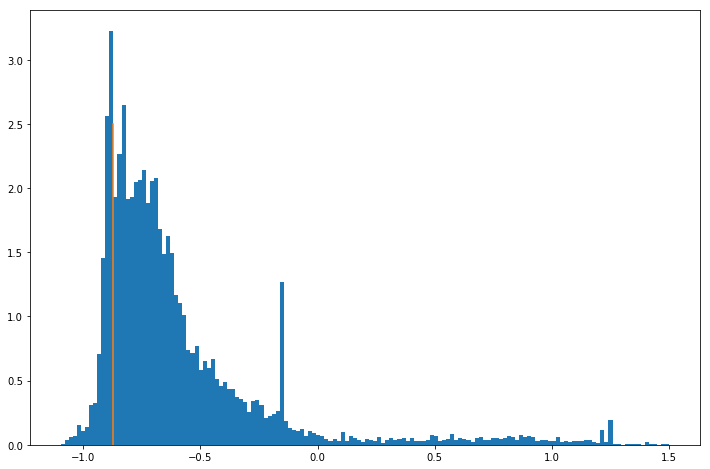

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(np.log10(data.Score), bins=150, normed=True)
ax.plot(x, y)

#### Try to strip mine the html of the private leaderboard to get final results

In [41]:
with open("statoil.html", "r") as _file:
    webdata = _file.read().replace('\n', '')

In [47]:
slices = webdata.split('<td class="competition-leaderboard__td-rank"')

In [52]:
subslices = slices[1].split("</td>")

In [64]:
keys = ["Rank", "Team Name", "Score", "Number of Entries"]
for subslice in subslices:
    for key in keys:
        if key in subslice:
            print(subslice)

 data-th="Rank">1
<td class="competition-leaderboard__td-team--gold" data-th="Team Name" title="David &amp; Weimin"><span>David &amp; Weimin</span>
<td class="competition-leaderboard__td-score" data-th="Score">0.0822
<td class="competition-leaderboard__td-entries" data-th="Number of Entries">118


In [101]:
def parse_block(subslices):
    '''
    Input:
    subslices: list of strings previously split by "</td>"
    '''
    keys = ["Rank", "Team Name", "Score", "Number of Entries"]
    for subslice in subslices:    
        # get the rank
        if keys[0] in subslice:
    #         print(subslice)
            rank = subslice.split(">")[1]
#             print(rank)

        # get the team name
        if keys[1] in subslice:
            # no split
            # <td class="competition-leaderboard__td-team--gold" data-th="Team Name" title="David &amp; Weimin"><span>David &amp; Weimin</span>

            # first split
            # "David &amp; Weimin"><span>David &amp; Weimin</span>

            # second split
            # "David &amp; Weimin"
            
            team = subslice.split('title=')[1].split('>')[0]
#             print(team)

        # get the score
        if keys[2] in subslice:
            # no split
            # <td class="competition-leaderboard__td-score" data-th="Score">0.0822

            # first split
            # 0.0822
            score = subslice.split('"Score">')[1]
#             print(score)

        # get the number of entries
        if keys[3] in subslice:
            # no split
            # <td class="competition-leaderboard__td-entries" data-th="Number of Entries">118

            # first split
            # 118
            num_entries = subslice.split('"Number of Entries">')[1]
#             print(num_entries)
    # going to use a tilda for CSV split, but strip tilda's out of any text to ensure data integrity
    line = "{:}~{:}~{:}~{:}\n".format(rank.replace("~", ""), team.replace("~", ""), score.replace("~", ""), num_entries.replace("~", ""))
            
    return line

In [105]:
write_list = ["rank~team_name~score~num_entries\n"]

for idx in range(1, len(slices)-1):
    subslices = slices[idx].split("</td>")
    
    line = parse_block(subslices)
    write_list.append(line)
#     print(line)

In [106]:
print(write_list)

['rank~team_name~score~num_entries\n', '1~"David &amp; Weimin"~0.0822~118\n', '2~"beluga"~0.0855~24\n', '3~"Evgeny Nekrasov"~0.0857~66\n', '4~"Mark Rippetoe witnesses"~0.0868~106\n', '5~"Kohei and Medrr"~0.0888~114\n', '6~"AzAkhtyamov"~0.0910~60\n', '7~"Juan Zhai \xe5\x8d\xb7\xe5\xae\x85"~0.0930~60\n', '8~"alijs"~0.0981~15\n', '9~"Troy Retter"~0.1046~5\n', '10~"ubik"~0.1051~55\n', '11~"VictorHBD"~0.1075~14\n', '12~"Overfitter"~0.1075~114\n', '13~"Pavel Pleskov"~0.1081~44\n', '14~"Vladim\xc3\xadr Kunc"~0.1082~19\n', '15~"Go! Go! Manta Mans"~0.1084~74\n', '16~"ya_bulochko"~0.1137~136\n', '17~"yanghu"~0.1152~28\n', '18~"kardec"~0.1157~96\n', '19~"biocomping"~0.1163~20\n', '20~"Strategists"~0.1167~55\n', '21~"Kudos to Kaggle community"~0.1168~19\n', '22~"mrnnnn"~0.1180~58\n', '23~"Vicens Gaitan"~0.1182~12\n', '24~"sorpmaL"~0.1191~64\n', '25~"18novembre"~0.1195~19\n', '26~"James Trotman"~0.1204~11\n', '27~"John Galt"~0.1208~8\n', '28~"monkeyking"~0.1233~139\n', '29~"Atanas Atanasov"~0.1235~

In [107]:
with open("private_leaderboard.csv", "w") as outfile:
    for line in write_list:
        outfile.write(line)

In [164]:
new_data = pd.read_csv("private_leaderboard.csv", delimiter="~")

new_data = new_data[new_data.score <= 1.0]

In [165]:
print(new_data.head())
print()
print(new_data.info())

   rank                team_name   score  num_entries
0     1       David &amp; Weimin  0.0822          118
1     2                   beluga  0.0855           24
2     3          Evgeny Nekrasov  0.0857           66
3     4  Mark Rippetoe witnesses  0.0868          106
4     5          Kohei and Medrr  0.0888          114
()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 4 columns):
rank           3216 non-null int64
team_name      3216 non-null object
score          3216 non-null float64
num_entries    3216 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 125.6+ KB
None


(array([  0.13590265,   0.25481748,   1.47794137,   5.89477764,
        10.75329754,   6.69320574,   4.63767809,   4.41683627,
         3.66937167,   2.76901659,   2.08950331,   1.47794137,
         1.25709955,   0.90035509,   0.67951327,   0.61156195,
         0.54361062,   0.54361062,   0.30578097,   0.3737323 ,
         0.3737323 ,   0.35674447,   0.15289049,   0.18686615,
         0.27180531,   0.30578097,   0.23782965,   0.18686615,
         0.15289049,   0.18686615,   0.13590265,   0.13590265,
         0.11891482,   1.40999004,   0.06795133,   0.15289049,
         0.06795133,   0.18686615,   0.0509635 ,   0.08493916,
         0.01698783,   0.03397566,   0.0509635 ,   0.01698783,
         0.03397566,   0.03397566,   0.01698783,   0.01698783,
         0.08493916,   0.01698783]), array([ 0.0822  ,  0.100504,  0.118808,  0.137112,  0.155416,  0.17372 ,
        0.192024,  0.210328,  0.228632,  0.246936,  0.26524 ,  0.283544,
        0.301848,  0.320152,  0.338456,  0.35676 ,  0.375064

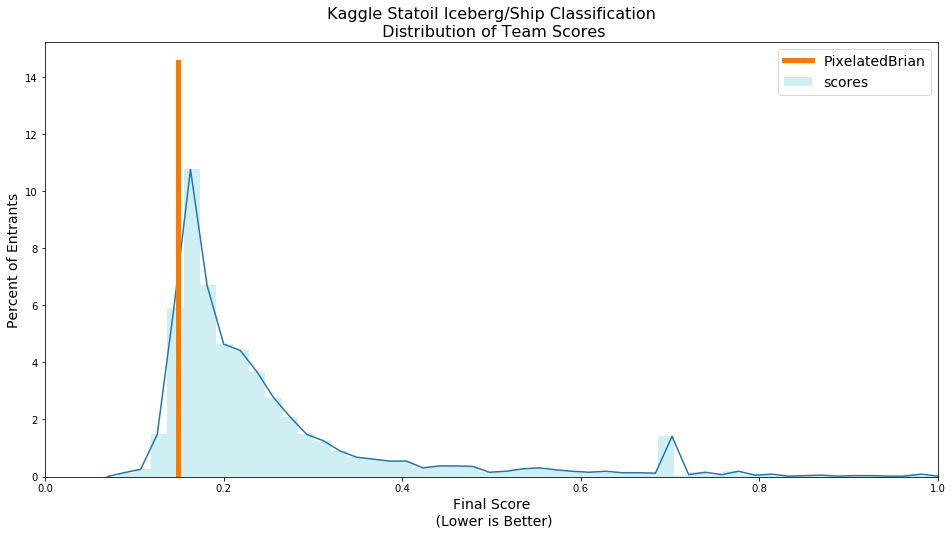

In [211]:
x = [0.1491, 0.1491]
y = [0.0, 14.5]

xrist = np.linspace(0.07, 1.0, 51)
fig, axs = plt.subplots(figsize=(16, 8))

boink = axs.hist(new_data.score, bins=50, normed=True, color="#18b1c2", label="scores", alpha=0.2)

new_boink = np.array([0.0] + list(boink[0]))
print(boink)
# axs.hist(new_data.score, bins=50, normed=True, color="#303030", histtype="step")
axs.plot(xrist, new_boink)
axs.set_title("Kaggle Statoil Iceberg/Ship Classification\n Distribution of Team Scores", size=16)
axs.set_xlabel("Final Score\n (Lower is Better)", size=14)
axs.set_ylabel("Percent of Entrants", size=14)
axs.plot(x, y, color="#ff7900", label="PixelatedBrian", lw=5)
# axs.set_ylim(0, 6.0)
# axs.set_xlim(-1.15, 0)
axs.set_xlim(0, 1.0)
axs.set_facecolor("#FFFFFF")
axs.legend(fontsize=14)



In [155]:
print("mean:", new_data.score.mean())
print("std:", new_data.score.std())

('mean:', 0.25076050995024757)
('std:', 0.14400623300054005)
